# Assessment 08 ETL Report

### Extract

The following datasets (with varying parameters) were extracted from the 2019 Annual Business Survey API: 
- company summary 
- characteristics of businesses
- characteristics of business owners
- module business characteristics (Technology)

To access the Census Bureau API, a free API key is required and can be found in the API User Guide at https://www.census.gov/data/developers/guidance/api-user-guide.Help_&_Contact_Us.html


The cells below outline the process used to consume the four datasets in the ABS API. Variations in API calls (same dataset with different parameters) are included under the most basic call for each dataset. 

In [2]:
# Import all necessary packages
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

# The code below displays all of the rows and columns rather than the ellipses for each of the data frames. 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Function that takes in json formatted data from API call and returns dataframe 
def CleanData(response):
    data = json.loads(response.text)
    df = pd.DataFrame.from_dict(data)

    #Remove first row from df 
    newcolumn = df.iloc[0]
    df = df.iloc[1:]

    #Rename columns
    df.rename(columns=newcolumn, inplace = True)

    #Reset index 
    df.reset_index(inplace = True, drop = True)

    return df


pd.set_option('display.max_columns', None)


In [4]:
# Company Summary 

base1 = 'https://api.census.gov/data/2018/abscs?'

params1 = {
    'get' : 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F',
    'for' : 'us',
    'key' : '10bf25bcce0f90f77afc9446298738e209ce9d58' 
}


response1 = requests.get(base1, params = params1)
company_summary = CleanData(response1)

In [5]:
# Characteristics of Businesses

base2 = 'https://api.census.gov/data/2018/abscb?'

params2 = {
    'get' : 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F',
    'for' : 'us',
    'key' : '10bf25bcce0f90f77afc9446298738e209ce9d58' 
}


response2 = requests.get(base2, params = params2)
char_of_biz = CleanData(response2)

In [6]:
# Characteristics of Business Owners

base3 = 'https://api.census.gov/data/2018/abscbo?'

params3 = {
    'get' : 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP,OWNPDEMP_F,OWNPDEMP_PCT,OWNPDEMP_PCT_F,OWNPDEMP_S,OWNPDEMP_S_F,OWNPDEMP_PCT_S,OWNPDEMP_PCT_S_F',
    'for' : 'us',
    # 'QDESC_LABEL' : 'EDUC',
    # 'QDESC_LABEL' : 'FLDEDUC'
    'key' : '10bf25bcce0f90f77afc9446298738e209ce9d58' 
}


response3 = requests.get(base3, params = params3)
char_of_biz_owners= CleanData(response3)


In [7]:
# Technology Characteristics of Business

base4 = 'https://api.census.gov/data/2018/abstcb?'

params4 = {
    'get' : 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,NSFSZFI,NSFSZFI_LABEL,FACTORS_P,FACTORS_P_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F',
    'for' : 'us',
    'key' : '10bf25bcce0f90f77afc9446298738e209ce9d58' 
}

response4 = requests.get(base4, params = params4)
tech_char_of_biz = CleanData(response4)


### Transform & Load

Each group member took different steps to transform data into visualization-ready forms. This section is divided by each group member's process. Although the general extraction process is outlined above, each section below also contains the specific parameters and extraction process each member used. 

#### Albert's Transformations:

In [2]:
# Extraction function
def getDF(url):
    response = requests.get(url).json()
    labels = response[0]
    rows = response[1:]
    df = pd.DataFrame(rows, columns=labels)
    return df

In [3]:
# Curating the url to only pull needed values for subsequent visualizations:
ev = getDF('https://api.census.gov/data/2018/abscbo?get=NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_VET,OWNER_VET_LABEL,QDESC,OWNCHAR,OWNCHAR_LABEL,OWNPDEMP&for=us:*&NAICS2017=00&QDESC_LABEL=*&key=243f22c29d452d221e30416744e701a2e051eee2')

In [4]:
# Veteran Age DF:  Created new DF from the extracted DF to drill down while focusing on Veterans' age.
vet_age = ev.loc[(ev.QDESC_LABEL == 'OWNRAGE')&(ev.OWNER_VET != '001')]
vet_age = vet_age.loc[(vet_age.OWNCHAR_LABEL != 'Total reporting')]
vet_age = vet_age[['OWNER_VET_LABEL','OWNCHAR_LABEL','OWNPDEMP']]
vet_age['OWNPDEMP'] = vet_age['OWNPDEMP'].astype(int)
veteran_age = vet_age.loc[(vet_age.OWNER_VET_LABEL == 'Veteran')].copy()

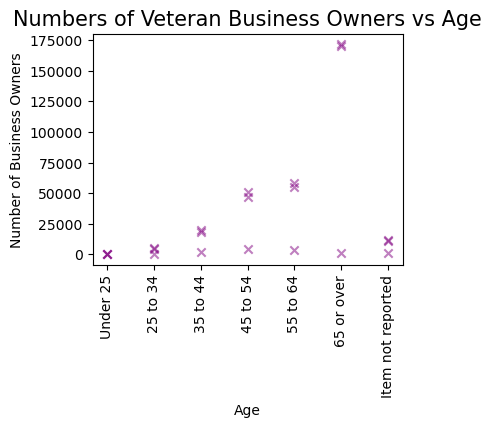

In [5]:
# Visualizations for the Veteran Age DF. Initially was going to have 2x visualizations per specialized
#   DF, but opted to use one while keeping the other as a spare in case it's needed later.

# pyplot scatterplot
plt.figure(figsize = (4,3))
plt.scatter(x = veteran_age['OWNCHAR_LABEL'],
            y = veteran_age['OWNPDEMP'],
            marker = 'x',
            alpha = .5,
            color = 'purple')
plt.xticks(rotation = 90)
plt.title('Numbers of Veteran Business Owners vs Age', size = 15);
plt.xlabel('Age');
plt.ylabel('Number of Business Owners');

# seaborn barplot
# sns.set_palette(palette='tab10')
# plt.figure(figsize=(4,3))
# sns.barplot(x = veteran_age['OWNCHAR_LABEL'], y = veteran_age['OWNPDEMP'], ci=None)
# plt.xticks(rotation = 90)
# plt.title('Numbers of Veteran Business Owners vs Age', size = 15);
# plt.xlabel('Age');
# plt.ylabel('Number of Business Owners');

In [6]:
# Veteran Sex DF:  Created new DF from the extracted DF to drill down focusing on Veterans' sex.
vet_sex = ev.loc[(ev.OWNER_SEX != '001')&(ev.OWNER_VET != '001')]
vet_sex = vet_sex.loc[(vet_sex.OWNCHAR_LABEL != 'Total reporting')]
vet_sex = vet_sex[['OWNER_VET_LABEL','OWNER_SEX_LABEL','OWNPDEMP']]
vet_sex['OWNPDEMP'] = vet_sex['OWNPDEMP'].astype(int)
veteran_sex = vet_sex.loc[(vet_sex.OWNER_VET_LABEL == 'Veteran')].copy()

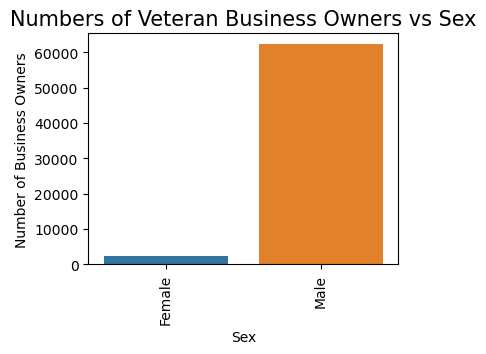

In [7]:
# Visualizations for the Veteran Sex DF

# pyplot scatterplot
# plt.figure(figsize = (4,3))
# plt.scatter(x = veteran_sex['OWNER_SEX_LABEL'],
#             y = veteran_sex['OWNPDEMP'],
#             marker = 'x',
#             alpha = .5,
#             color = 'purple')
# plt.xticks(rotation = 15)
# plt.title('Numbers of Veteran Business Owners vs Sex', size = 15);
# plt.xlabel('Sex');
# plt.ylabel('Number of Business Owners');

#seaborn barplot
sns.set_palette(palette='tab10')
plt.figure(figsize=(4,3))
sns.barplot(x = veteran_sex['OWNER_SEX_LABEL'], y = veteran_sex['OWNPDEMP'], ci=None)
plt.xticks(rotation = 90)
plt.title('Numbers of Veteran Business Owners vs Sex', size = 15);
plt.xlabel('Sex');
plt.ylabel('Number of Business Owners');

In [8]:
# Veteran Education DF:  Created new DF from the extracted DF to drill down into Veterans' education.
vet_educ = ev.loc[(ev.QDESC_LABEL == 'EDUC')&(ev.OWNER_VET != '001')]
vet_educ = vet_educ.loc[(vet_educ.OWNCHAR_LABEL != 'Total reporting')]
vet_educ = vet_educ[['OWNER_VET_LABEL','OWNCHAR_LABEL','OWNPDEMP']]
vet_educ['OWNPDEMP'] = vet_educ['OWNPDEMP'].astype(int)
veteran_edu = vet_educ.loc[(vet_educ.OWNER_VET_LABEL == 'Veteran')].copy()

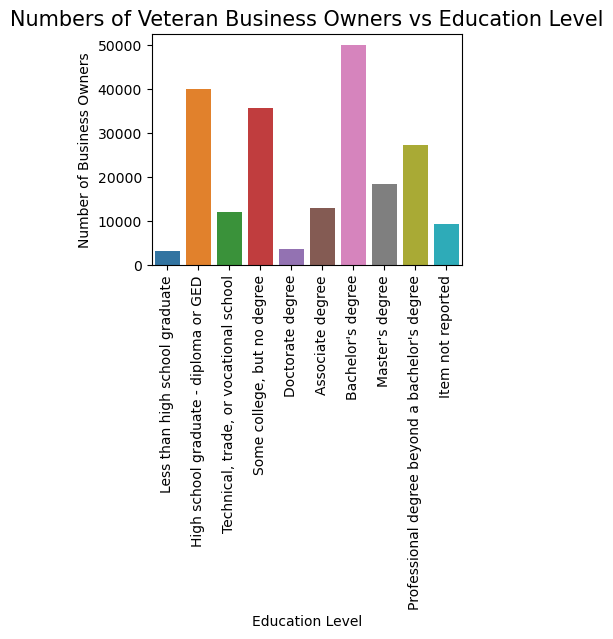

In [9]:
# Visualizations for the Veteran Education DF

# pyplot scatterplot
# plt.figure(figsize = (4,3))
# plt.scatter(x = veteran_edu['OWNCHAR_LABEL'],
#             y = veteran_edu['OWNPDEMP'],
#             marker = 'x',
#             alpha = .5,
#             color = 'purple')
# plt.xticks(rotation = 90)
# plt.title('Numbers of Veteran Business Owners vs Education Level', size = 15);
# plt.xlabel('Education Level');
# plt.ylabel('Number of Business Owners');

# seaborn barplot
sns.set_palette(palette='tab10')
plt.figure(figsize=(4,3))
sns.barplot(x = veteran_edu['OWNCHAR_LABEL'], y = veteran_edu['OWNPDEMP'], ci=None)
plt.xticks(rotation = 90)
plt.title('Numbers of Veteran Business Owners vs Education Level', size = 15);
plt.xlabel('Education Level');
plt.ylabel('Number of Business Owners');

#### Meghan's Transformations:

In [8]:
## step 1: loading data in and using clean data function to return dataframe

params_yb_famown = {
    'get' : 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,YIBSZFI,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F',
    'for' : 'us',
    'QDESC_LABEL' : 'FAMOWN',
    'key' : '10bf25bcce0f90f77afc9446298738e209ce9d58' 
}
response_yb_famown = requests.get(base2, params = params_yb_famown)

yb_famown = CleanData(response_yb_famown)


## step 2: create new df that focuses on total for all sectors (NAICS2017 = 00), and disregards veteran, ethnicity, race, and sex group. 
yb = yb_famown[(yb_famown.VET_GROUP == '001') & (yb_famown.SEX == '001') & (yb_famown.ETH_GROUP == '001') & (yb_famown.NAICS2017 == '00') & (yb_famown.RACE_GROUP == '00')]


## step 3: select columns of interest 
yb = yb[['YIBSZFI', 'BUSCHAR', 'BUSCHAR_LABEL', 'FIRMPDEMP', 'FIRMPDEMP_PCT', 'RCPPDEMP', 'EMP', 'EMP_PCT', 'PAYANN', 'PAYANN_PCT']]

## step 4: removing unwanted rows
# Removing rows where YIBSZFI is aggregated ('totals')
yb = yb[yb.YIBSZFI != '001']
# Only keeping family and not family owned. Removing item not reported and total rows 
yb = yb[(yb.BUSCHAR == 'BM') | (yb.BUSCHAR == 'BN')]

## step 5: changing datatypes
yb = yb.astype({"FIRMPDEMP": "int", "FIRMPDEMP_PCT": "float", "RCPPDEMP": "int64", "EMP": "int64", "EMP_PCT": "float", "PAYANN": "int64", "PAYANN_PCT": "float"})

## step 6: sort df by years in business
yb.sort_values(by = ['YIBSZFI'], inplace= True)
yb.reset_index(inplace = True, drop = True)

## step 7: replace YIBSZFI codes with descriptive values
yb.YIBSZFI.replace('311', 'less than 2', inplace=True)
yb.YIBSZFI.replace('318', '2 to 3', inplace=True)
yb.YIBSZFI.replace('319', '4 to 5', inplace=True)
yb.YIBSZFI.replace('321', '6 to 10', inplace=True)
yb.YIBSZFI.replace('322', '11 to 15', inplace=True)
yb.YIBSZFI.replace('323', '16 +', inplace=True)

## dataframe result: 
yb

,YIBSZFI,BUSCHAR,BUSCHAR_LABEL,FIRMPDEMP,FIRMPDEMP_PCT,RCPPDEMP,EMP,EMP_PCT,PAYANN,PAYANN_PCT
0,less than 2,BM,Family-owned,58403,24.7,37730276,297945,27.7,8629168,24.5
1,less than 2,BN,Not family-owned,177725,75.3,118497006,775859,72.3,26568681,75.5
2,2 to 3,BM,Family-owned,84089,25.7,78706219,545655,27.0,16604437,26.2
3,2 to 3,BN,Not family-owned,242514,74.3,200841567,1473911,73.0,46678795,73.8
4,4 to 5,BM,Family-owned,66709,26.3,75707166,483986,29.7,15366568,25.4
5,4 to 5,BN,Not family-owned,186678,73.7,186535797,1147235,70.3,45221266,74.6
6,6 to 10,BM,Family-owned,129108,27.8,162762860,1159157,33.6,38819092,26.9
7,6 to 10,BN,Not family-owned,334935,72.2,418575581,2293629,66.4,105455713,73.1
8,11 to 15,BM,Family-owned,133329,31.3,184964523,1127914,35.1,41192854,31.2
9,11 to 15,BN,Not family-owned,292920,68.7,391573905,2081775,64.9,91044903,68.8


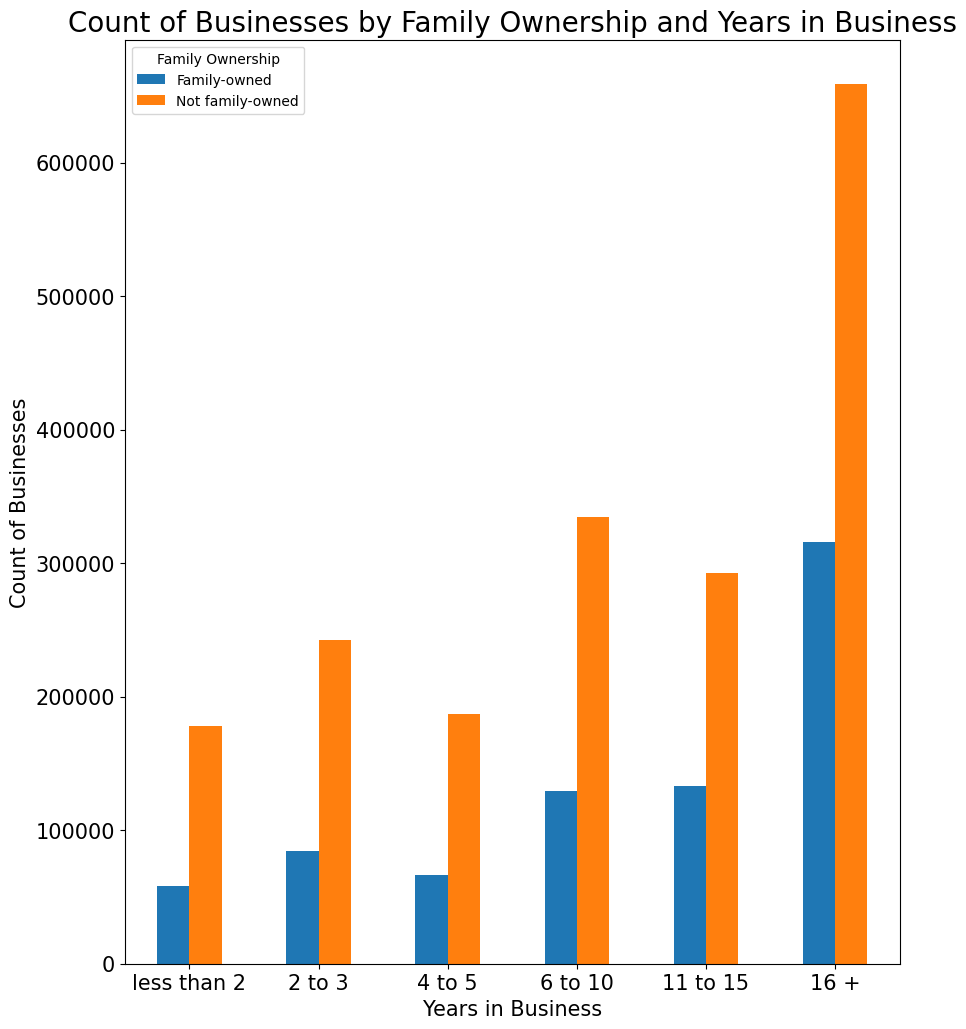

In [9]:
## Transforming for Clustered Bar Chart

# step 1: group by variables of interest, aggregate by firmpdemp (count of firms)
yb_famown_count = yb.groupby(['YIBSZFI', 'BUSCHAR_LABEL'])['FIRMPDEMP'].sum().unstack().fillna(0)

# step 2: sort by years in business labels 
sort_dict = {'less than 2':0,'2 to 3':1,'4 to 5':2, '6 to 10':3, '11 to 15':4, '16 +':5}
yb_famown_count['new'] = yb_famown_count.index
yb_famown_count['sortmap'] = yb_famown_count['new'].map(lambda x: sort_dict[x])
yb_famown_count = yb_famown_count.sort_values('sortmap')

# step 3: remove fields added for sorting
yb_famown_count_VIS = yb_famown_count[["Family-owned", "Not family-owned"]]

# step 4: plot
plt.rcParams["figure.figsize"] = (10,12)

yb_famown_count_VIS.plot(kind='bar', stacked=False)
plt.title('Count of Businesses by Family Ownership and Years in Business', fontsize=20)
plt.ylabel('Count of Businesses', fontsize = 15)
plt.xlabel('Years in Business', fontsize = 15)
plt.xticks(rotation=0, ha='center', fontsize = 15)
plt.yticks(rotation=0, fontsize = 15)
plt.legend(title='Family Ownership')

In [10]:

## Transforming for 100% Stacked Bar Chart

# step 1: group by variables of interest, aggregate by firmpdemp_pct (percent of firms )
yb_famown_pct = yb.groupby(['YIBSZFI', 'BUSCHAR_LABEL'])['FIRMPDEMP_PCT'].sum().unstack().fillna(0)

# step 2 and 3 and 4 same as above 

In [12]:

## Transforming for Plotly Map 

## step 1: loading data in with different parameters, and use clean data function to return dataframe
params_famown_state = {
    'get' : 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F',
    'for' : 'state',
    'QDESC_LABEL' : 'FAMOWN',
    'key' : '10bf25bcce0f90f77afc9446298738e209ce9d58' 
}
response_famown_state = requests.get(base2, params = params_famown_state)

famown_state = CleanData(response_famown_state)


## step 2: select columns of interest 
famown_state = famown_state[['NAME', 'BUSCHAR', 'BUSCHAR_LABEL', 'FIRMPDEMP', 'FIRMPDEMP_PCT']]

## step 3: select rows of interest (rows where businesses are family owned)
famown_state = famown_state[famown_state.BUSCHAR == 'BM']


## step 4: change datatypes
famown_state = famown_state.astype({"FIRMPDEMP": "int", "FIRMPDEMP_PCT": "float"})


## step 5: replace state names to abbrevations with function
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

famown_state['NAME'] = famown_state['NAME'].replace(us_state_to_abbrev)



# step 6: plot choropleth map 
fig = px.choropleth(famown_state, locations='NAME',
                    locationmode="USA-states", color='FIRMPDEMP_PCT', scope="usa")
 
fig.show()

### Sarvani's Transformations:

In [11]:
# Step 1: loading data in and using clean data function to return dataframe
# focusing on the characteristics of the business owners dataset

# API request for level of education within the characteristics of the business owners dataset
params_edu_owners = {
    'get' : 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP,OWNPDEMP_F,OWNPDEMP_PCT,OWNPDEMP_PCT_F,OWNPDEMP_S,OWNPDEMP_S_F,OWNPDEMP_PCT_S,OWNPDEMP_PCT_S_F',
    'for' : 'us',
    'QDESC_LABEL' : 'EDUC',
    'key' : '10bf25bcce0f90f77afc9446298738e209ce9d58' 
}
response_edu_owners = requests.get(base3, params = params_edu_owners)
char_of_biz_owners_edu_df= CleanData(response_edu_owners)

# API request for education major within the characteristics of the business owners dataset
params_educationmajor_owners = {
    'get' : 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP,OWNPDEMP_F,OWNPDEMP_PCT,OWNPDEMP_PCT_F,OWNPDEMP_S,OWNPDEMP_S_F,OWNPDEMP_PCT_S,OWNPDEMP_PCT_S_F',
    'for' : 'us',
    'QDESC_LABEL' : 'FLDEDUC',
    'key' : '10bf25bcce0f90f77afc9446298738e209ce9d58' 
} 
response_educationmajor_owners = requests.get(base3, params = params_educationmajor_owners)
char_of_biz_owners_educationmajor_df= CleanData(response_educationmajor_owners)

# Step 2: renaming the OWNCHAR_LABEL columns in both dataframes to their respective labels of "highest_degree" and "education_major".
char_of_biz_owners_edu_df.rename(columns = { "OWNCHAR_LABEL" : "highest_degree"}, inplace = True)
char_of_biz_owners_educationmajor_df.rename(columns = { "OWNCHAR_LABEL" : "education_major"}, inplace = True)

# Step 3: Rest of the cleaning steps are shown in the 4 visualizations below. 


Visualizaton 1: Number of overall business owners based on level of education.

In [22]:
# creating the dataframe
biz_edu = char_of_biz_owners_edu_df.loc[(char_of_biz_owners_edu_df.OWNER_VET == '001')&(char_of_biz_owners_edu_df.QDESC == 'O07')]
biz_edu = biz_edu.loc[(biz_edu.highest_degree != 'Total reporting')]
biz_edu = biz_edu.loc[(biz_edu.highest_degree != "Item not reported")]
biz_edu = biz_edu[['OWNER_SEX_LABEL','highest_degree','OWNPDEMP']].copy()
biz_edu['OWNPDEMP'] = biz_edu['OWNPDEMP'].astype(int)

In [24]:
# Use a pandas groupby() function to group by 'highest_degree' then aggregate a sum of the 'OWNPDEMP' in descending order.
groupeddf1 = biz_edu.groupby("highest_degree").sum()
groupeddf1 = groupeddf1.sort_values(by = "OWNPDEMP", ascending = False)
groupeddf1 = pd.DataFrame(groupeddf1).reset_index()
groupeddf1

,highest_degree,OWNPDEMP
0,Bachelor's degree,19848162
1,High school graduate - diploma or GED,12719226
2,"Some college, but no degree",9390074
3,Professional degree beyond a bachelor's degree,7440083
4,Master's degree,6059292
5,Associate degree,3678948
6,"Technical, trade, or vocational school",3677230
7,Less than high school graduate,1773662
8,Doctorate degree,1245550


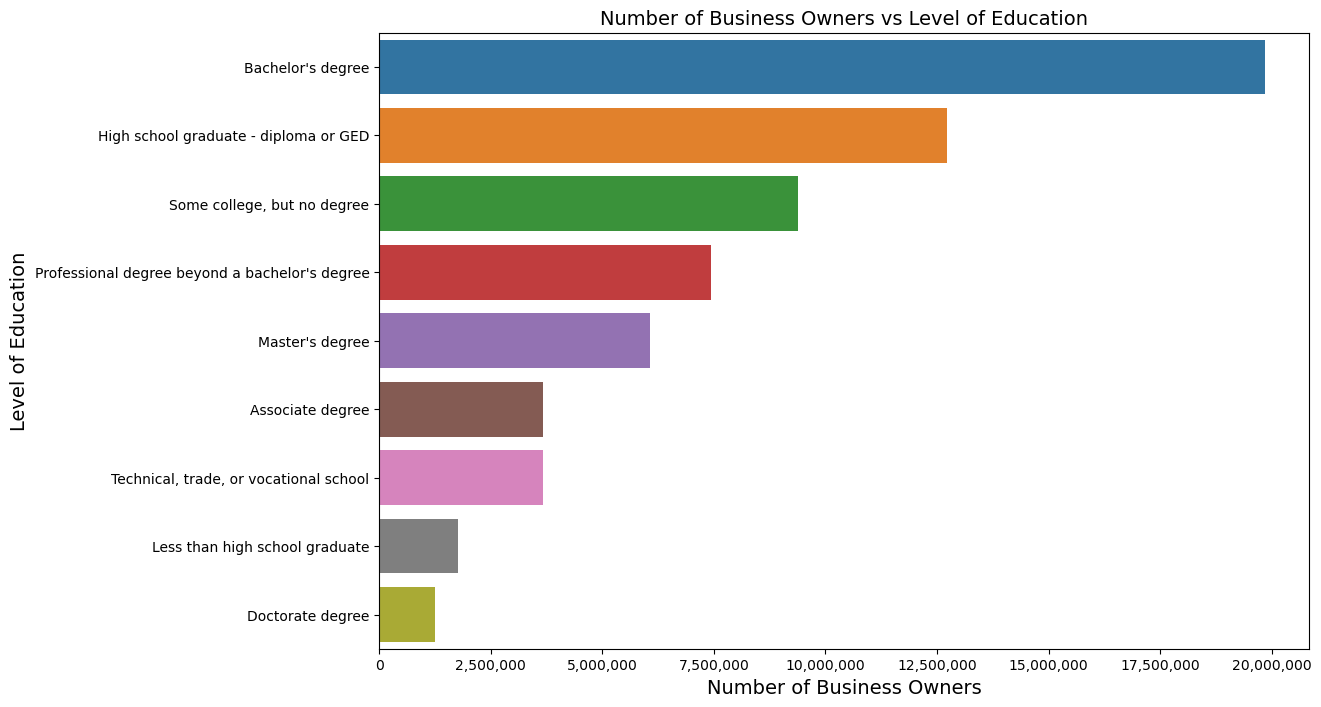

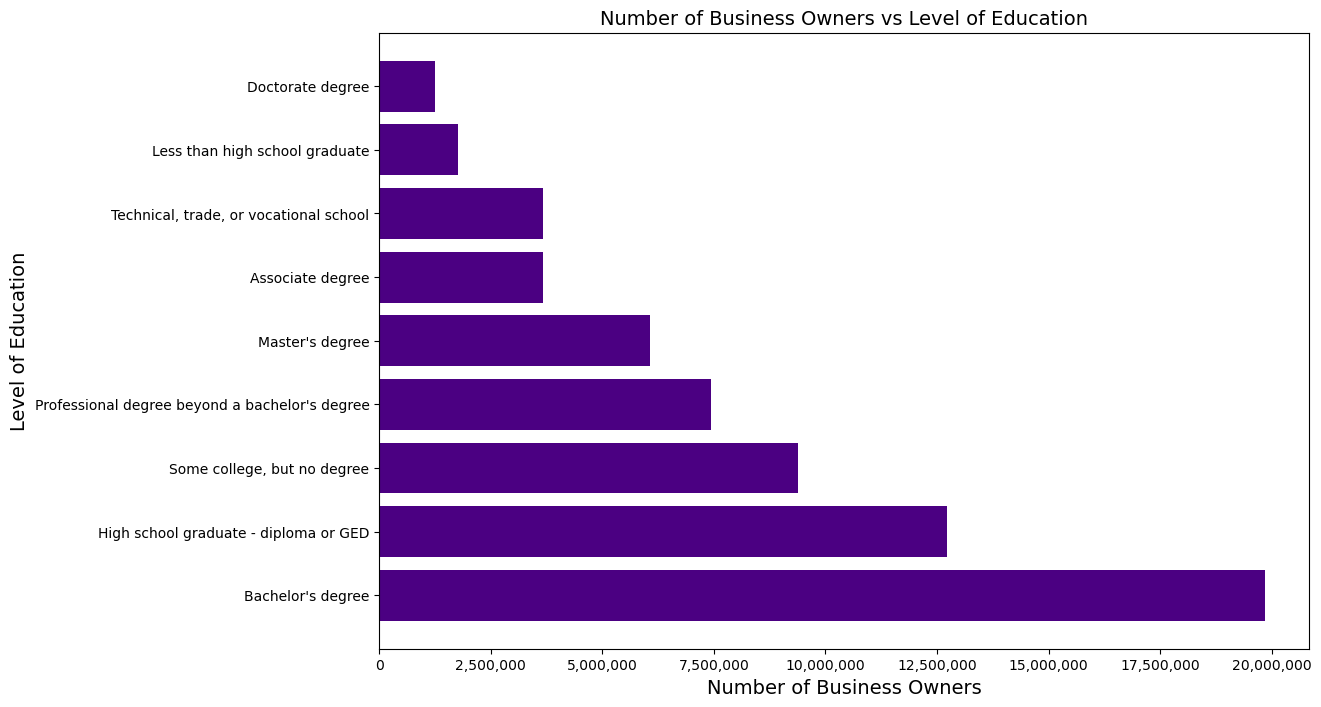

In [25]:
# seaborn visualization
plt.figure(figsize=(12,8))
sns.barplot(x = groupeddf1["OWNPDEMP"], y = groupeddf1["highest_degree"], orient = "h", ci = None)
    
plt.title('Number of Business Owners vs Level of Education', size = 14)
plt.ylabel('Level of Education', size =14)
plt.xlabel('Number of Business Owners', size =14);

# making sure the axis is not in scientific notation
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

# pyplot visualization 
plt.figure(figsize = (12,8))

plt.barh(y = groupeddf1['highest_degree'],
        width = groupeddf1["OWNPDEMP"], color = "indigo")

plt.title('Number of Business Owners vs Level of Education', size = 14)
plt.ylabel('Level of Education', size =14)
plt.xlabel('Number of Business Owners', size =14);

# making sure the axis is not in scientific notation
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

 Visualization 2: Number of veteran business owners based on level of education. 

In [26]:
# creating the dataframe
vet_edu = char_of_biz_owners_edu_df.loc[(char_of_biz_owners_edu_df.OWNER_VET != '001')&(char_of_biz_owners_edu_df.QDESC == 'O07')]
vet_edu = vet_edu.loc[(vet_edu.highest_degree != 'Total reporting')]
vet_edu = vet_edu.loc[(vet_edu.highest_degree != "Item not reported")]
vet_edu = vet_edu[['OWNER_VET_LABEL','highest_degree','OWNPDEMP']]
vet_edu['OWNPDEMP'] = vet_edu['OWNPDEMP'].astype(int)
veteran_edu = vet_edu.loc[(vet_edu.OWNER_VET_LABEL == 'Veteran')].copy()

In [27]:
# Use a pandas groupby() function to group by 'highest_degree' then aggregate a sum of the 'OWNPDEMP' in descending order.
groupeddf2 = veteran_edu.groupby("highest_degree").sum()
groupeddf2 = groupeddf2.sort_values(by = "OWNPDEMP", ascending = False)
groupeddf2 =  pd.DataFrame(groupeddf2).reset_index()
groupeddf2

,highest_degree,OWNPDEMP
0,Bachelor's degree,757114
1,High school graduate - diploma or GED,600445
2,"Some college, but no degree",535917
3,Professional degree beyond a bachelor's degree,409428
4,Master's degree,277662
5,Associate degree,193560
6,"Technical, trade, or vocational school",181158
7,Doctorate degree,52044
8,Less than high school graduate,44545


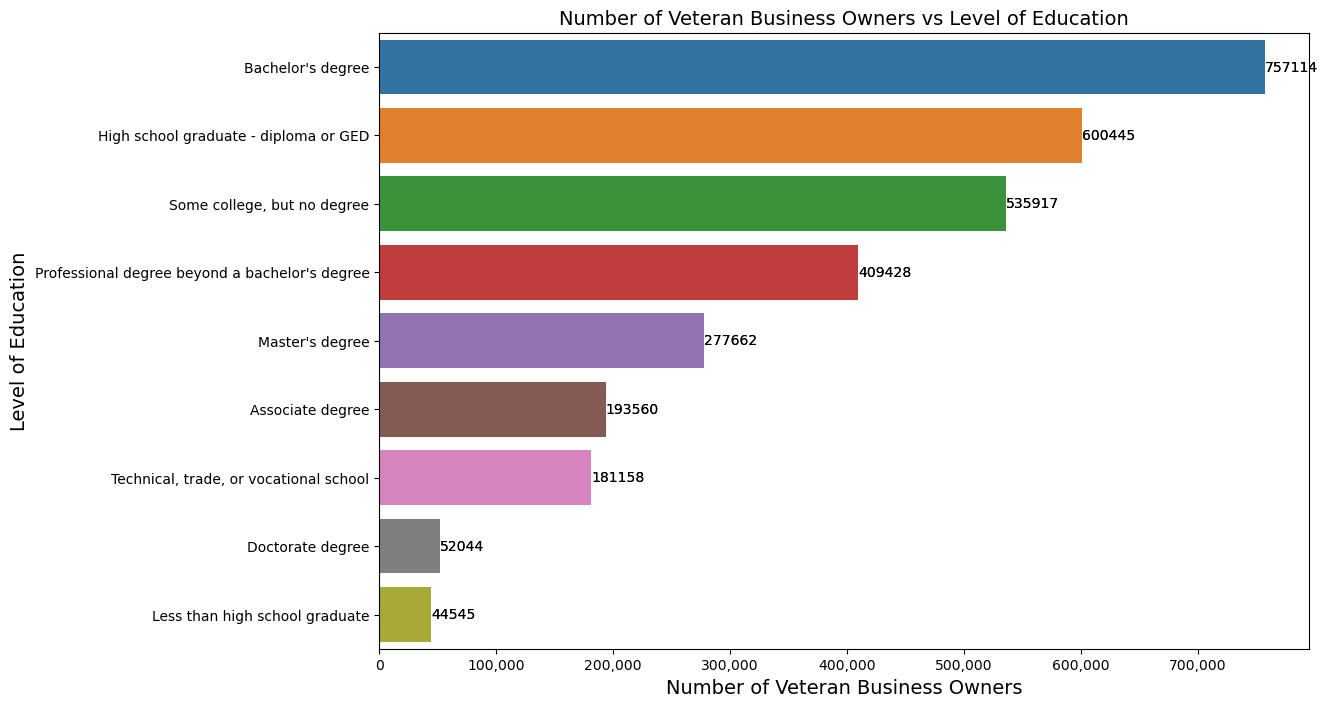

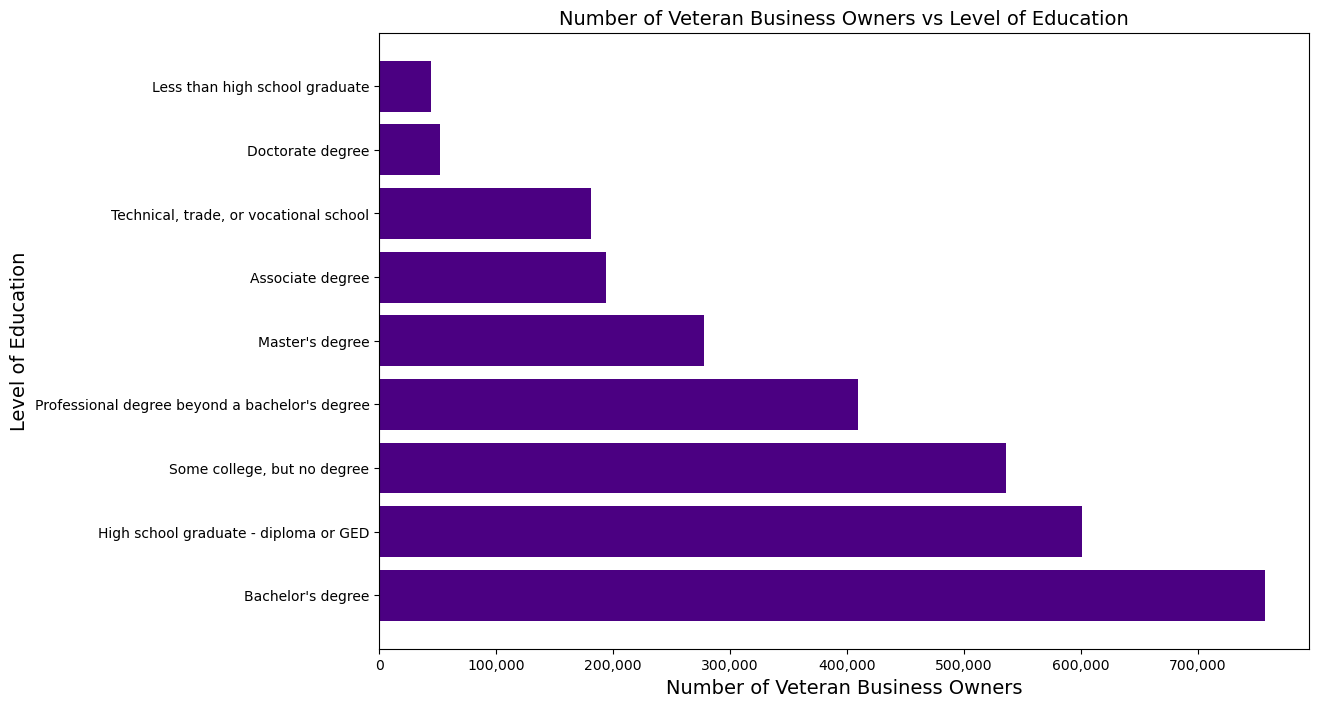

In [28]:
# seaborn visualization
plt.figure(figsize=(12,8))
sns.barplot (x = groupeddf2["OWNPDEMP"], y = groupeddf2["highest_degree"], orient = "h", ci= None)

# shows the labeled values in the visualization
ax = sns.barplot (x = groupeddf2["OWNPDEMP"], y = groupeddf2["highest_degree"], orient = "h", ci= None)
for i in ax.containers: 
    ax.bar_label(i,)
    
plt.title('Number of Veteran Business Owners vs Level of Education', size = 14)
plt.ylabel('Level of Education', size =14)
plt.xlabel('Number of Veteran Business Owners', size =14);

# making sure the axis is not in scientific notation
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

# pyplot visualization
plt.figure(figsize = (12,8))
plt.barh(y = groupeddf2['highest_degree'],
            width = groupeddf2['OWNPDEMP'], color = "indigo")

plt.title('Number of Veteran Business Owners vs Level of Education', size = 14)
plt.ylabel('Level of Education', size =14)
plt.xlabel('Number of Veteran Business Owners', size =14);

# making sure the axis is not in scientific notation
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

Visualization 3: Number of overall business owners and their education major

In [29]:
# creating the dataframe
bus_educationmajor = char_of_biz_owners_educationmajor_df.loc[(char_of_biz_owners_educationmajor_df.OWNER_VET == '001')&(char_of_biz_owners_educationmajor_df.QDESC == 'O08')]
bus_educationmajor = bus_educationmajor.loc[(bus_educationmajor.education_major != 'Total reporting')]
bus_educationmajor = bus_educationmajor.loc[(bus_educationmajor.education_major != "Item not reported")]
bus_educationmajor = bus_educationmajor[['education_major','OWNPDEMP']].copy()
bus_educationmajor['OWNPDEMP'] = bus_educationmajor['OWNPDEMP'].astype(int)

In [30]:
# Use a pandas groupby() function to group by 'education_major' then aggregate a sum of the 'OWNPDEMP' in descending order.
groupeddf3 = bus_educationmajor.groupby("education_major").sum()
groupeddf3 = groupeddf3.sort_values(by = "OWNPDEMP", ascending = False)
groupeddf3 = pd.DataFrame(groupeddf3).reset_index()
groupeddf3

,education_major,OWNPDEMP
0,"No Bachelor's, Master's, Doctorate, or Profess...",33830281
1,Other non-science and non-engineering related ...,7554479
2,Management and administration fields,6908616
3,Health,5245945
4,Engineering,2790703
5,"Economics, political, psychology, sociology an...",2672447
6,Art and humanities fields,2496447
7,Sales and marketing fields,2487284
8,"Biological, agricultural and environmental lif...",1871814
9,"Education, except science and math teacher edu...",1765085


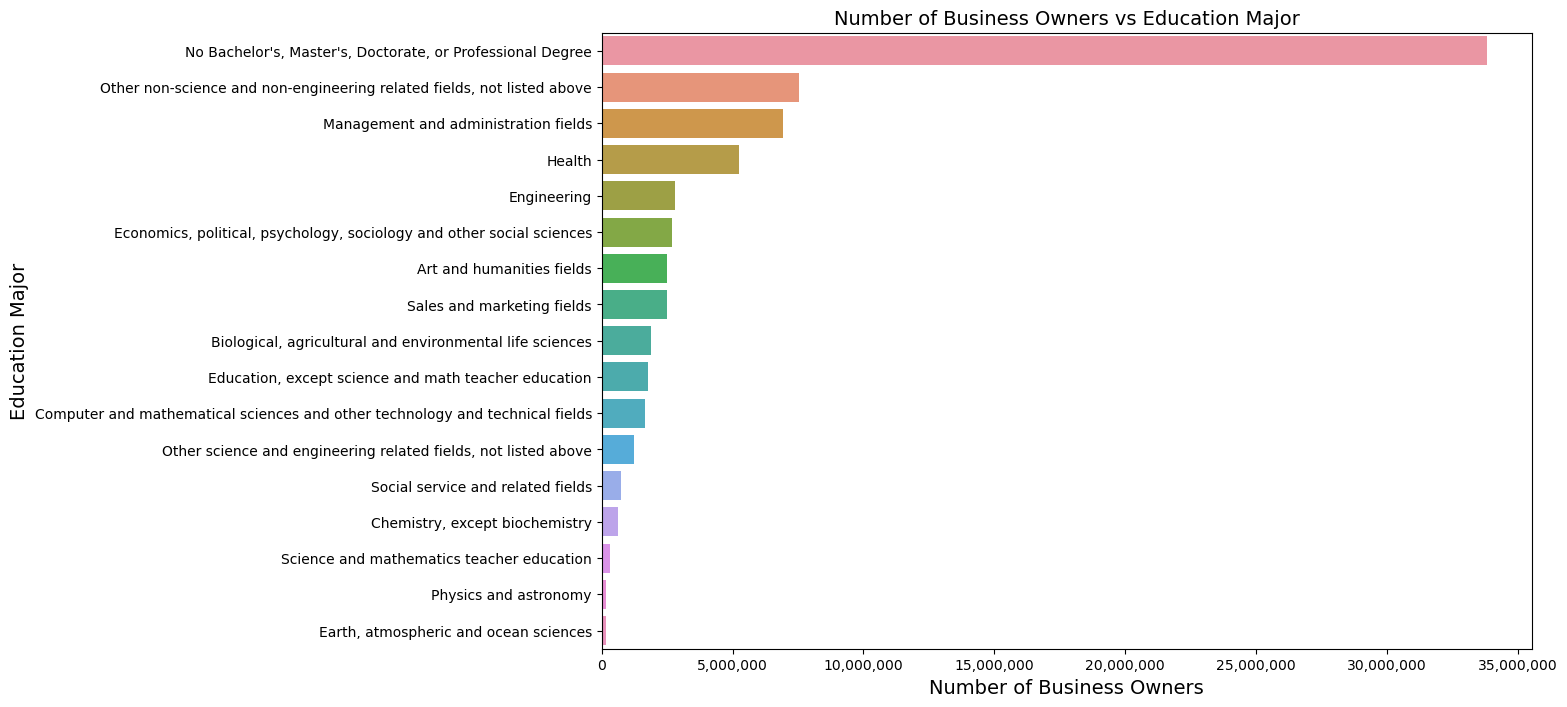

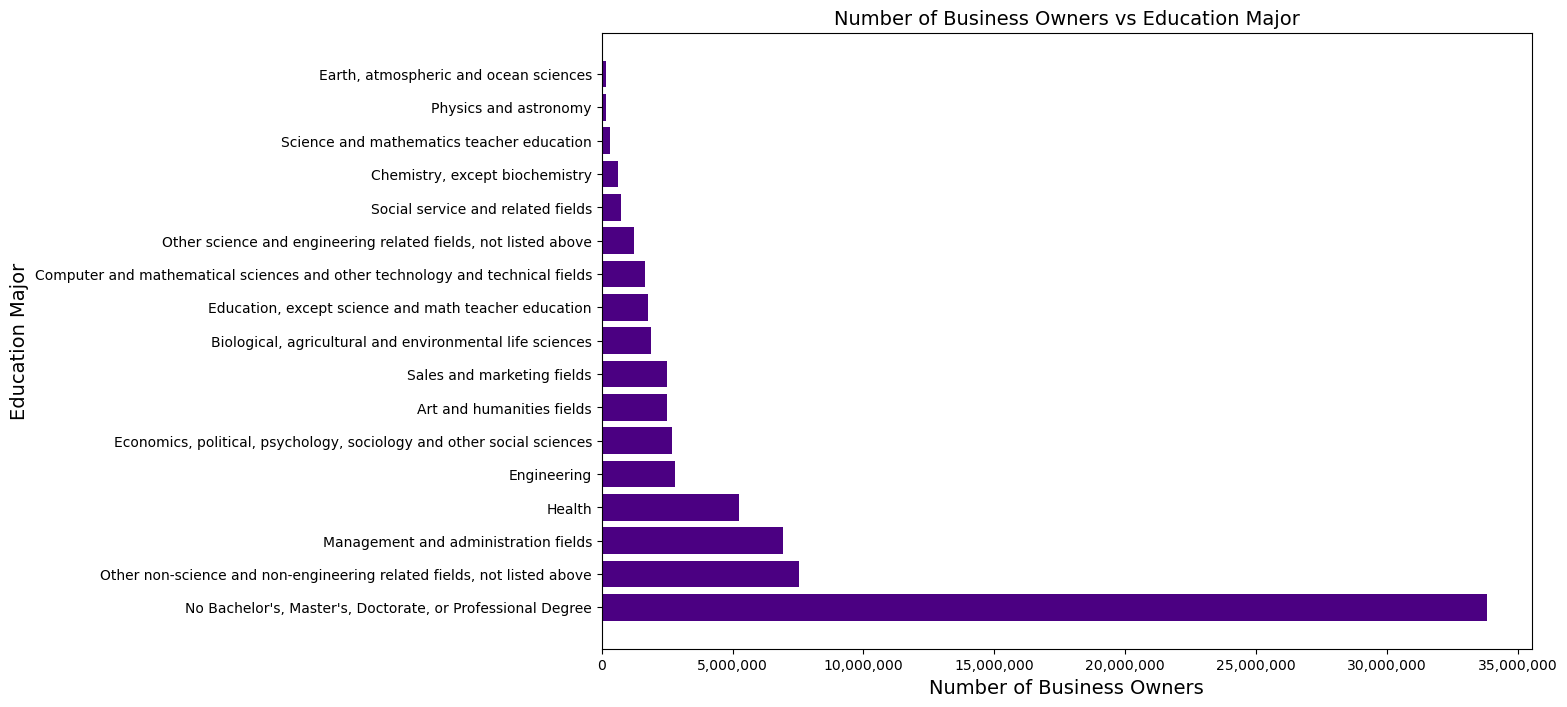

In [31]:
# seaborn visualization
plt.figure(figsize=(12,8))
sns.barplot(y = groupeddf3['education_major'], x = groupeddf3['OWNPDEMP'], orient= "h", ci= None)
    
plt.title('Number of Business Owners vs Education Major', size = 14)
plt.ylabel('Education Major', size =14)
plt.xlabel('Number of Business Owners', size =14);

# making sure the axis is not in scientific notation
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

# pyplot visualization
plt.figure(figsize = (12,8))
plt.barh( y = groupeddf3['education_major'],
            width = groupeddf3['OWNPDEMP'], color = "indigo")

plt.title('Number of Business Owners vs Education Major', size = 14)
plt.ylabel('Education Major', size =14)
plt.xlabel('Number of Business Owners', size =14);

# making sure the axis is not in scientific notation
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

 Visualization 4: Number of veteran business owners and their education major

In [32]:
# creating the dataframe
vet_educationmajor = char_of_biz_owners_educationmajor_df.loc[(char_of_biz_owners_educationmajor_df.OWNER_VET != '001')&(char_of_biz_owners_educationmajor_df.QDESC == 'O08')]
vet_educationmajor = vet_educationmajor.loc[(vet_educationmajor.education_major != 'Total reporting')]
vet_educationmajor = vet_educationmajor.loc[(vet_educationmajor.education_major != "Item not reported")]
vet_educationmajor = vet_educationmajor[['OWNER_VET_LABEL', 'education_major','OWNPDEMP']]
vet_educationmajor['OWNPDEMP'] = vet_educationmajor['OWNPDEMP'].astype(int)
veteran_educationmajor = vet_educationmajor.loc[(vet_educationmajor.OWNER_VET_LABEL == 'Veteran')].copy()

In [33]:
# Use a pandas groupby() function to group by 'education_major' then aggregate a sum of the 'OWNPDEMP' in descending order.
groupeddf4 = veteran_educationmajor.groupby("education_major").sum()
groupeddf4 = groupeddf4.sort_values(by = "OWNPDEMP", ascending = False)
groupeddf4 =  pd.DataFrame(groupeddf4).reset_index()
groupeddf4

,education_major,OWNPDEMP
0,"No Bachelor's, Master's, Doctorate, or Profess...",1701460
1,Management and administration fields,353805
2,Other non-science and non-engineering related ...,341226
3,Health,244103
4,Engineering,155903
5,"Economics, political, psychology, sociology an...",117759
6,Sales and marketing fields,97668
7,"Biological, agricultural and environmental lif...",74731
8,Computer and mathematical sciences and other t...,67580
9,Art and humanities fields,59407


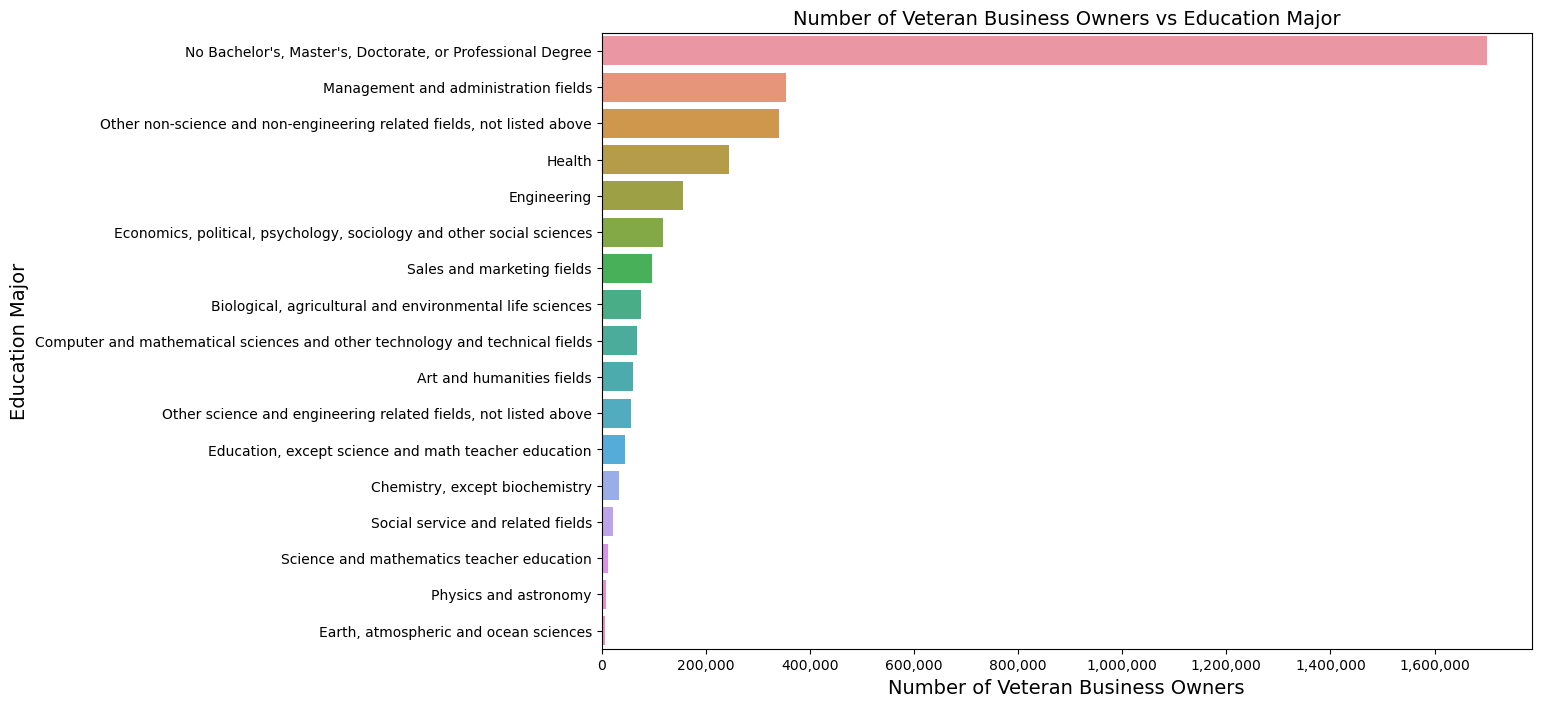

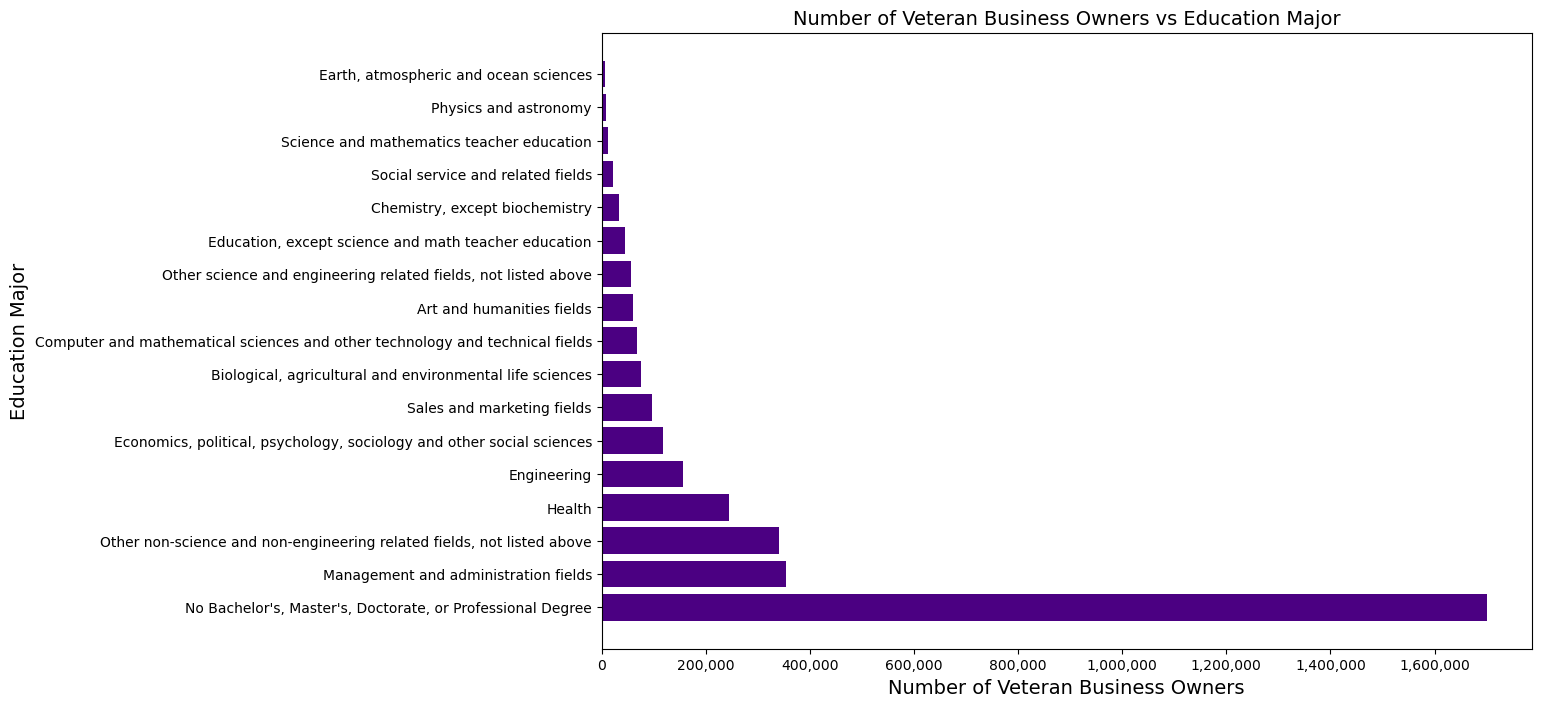

In [35]:
# seaborn visualization
plt.figure(figsize=(12,8))
sns.barplot(y = groupeddf4['education_major'], x = groupeddf4['OWNPDEMP'], orient= "h", ci = None)
    
plt.title('Number of Veteran Business Owners vs Education Major', size = 14)
plt.ylabel('Education Major', size =14)
plt.xlabel('Number of Veteran Business Owners', size =14);

# making sure the axis is not in scientific notation
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

# pyplot visualization
plt.figure(figsize = (12,8))
plt.barh(y = groupeddf4['education_major'],
            width = groupeddf4['OWNPDEMP'], color= "indigo")

plt.title('Number of Veteran Business Owners vs Education Major', size = 14)
plt.ylabel('Education Major', size =14)
plt.xlabel('Number of Veteran Business Owners', size =14);

# making sure the axis is not in scientific notation
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

### Stephen's Transformations:

In [1]:
# URL FOR THE COMPANY SUMMARY TABLE
url_company_summary = 'https://api.census.gov/data/2018/abscs?get='
# VARIABLES TO GET FROM THE TABLE
get1 = 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F'
get1state = 'GEO_ID,NAME,NAICS2017_LABEL,SEX_LABEL,ETH_GROUP_LABEL,RACE_GROUP_LABEL,VET_GROUP_LABEL,EMPSZFI_LABEL,FIRMPDEMP,RCPPDEMP,EMP,PAYANN'
# MY API KEY
api_key = '&key=10bf25bcce0f90f77afc9446298738e209ce9d58'

In [4]:
# company summary for US
url1 = f'{url_company_summary}{get1}&for=us:*{api_key}'
response_csu = requests.get(url1)
# company summary for STATES
url1st = f'{url_company_summary}{get1state}&for=state:*{api_key}'
response_css = requests.get(url1st)

In [50]:
# Load the data into a JSON, convert to a df using pandas
data = json.loads(response_csu.text)
company_summary = pd.DataFrame.from_dict(data)

#Remove the first row from the DF
newcolumn1 = company_summary.iloc[0]
company_summary = company_summary.iloc[1:]

#Rename the columns
company_summary.rename(columns=newcolumn1, inplace = True)
company_summary.rename(columns = {
    'NAICS2017_LABEL' : 'industry',
    'RCPPDEMP' : 'revenue',
    'PAYANN' : 'annual_payroll'
}, inplace = True)
company_summary['industry'] = company_summary['industry'].replace('Administrative and support and waste management and remediation services','Administrative and Waste Management')

#Reset the index
company_summary.reset_index(inplace = True, drop = True)

#Change Necessary Types
company_summary[['revenue', 'annual_payroll']] = company_summary[['revenue', 'annual_payroll']].astype('int64')
company_summary_sorted = company_summary.sort_values(by='annual_payroll', ascending = False)


company_summary.industry.unique()

array(['Total for all sectors',
       'Agriculture, forestry, fishing and hunting',
       'Mining, quarrying, and oil and gas extraction', 'Manufacturing',
       'Utilities', 'Construction', 'Wholesale trade', 'Retail trade',
       'Transportation and warehousing', 'Information',
       'Finance and insurance', 'Real estate and rental and leasing',
       'Professional, scientific, and technical services',
       'Management of companies and enterprises',
       'Administrative and Waste Management', 'Educational services',
       'Health care and social assistance',
       'Arts, entertainment, and recreation',
       'Accommodation and food services',
       'Other services (except public administration)',
       'Industries not classified'], dtype=object)

In [41]:
# View Number Obeservations by race
racedf = company_summary['RACE_GROUP_LABEL'].value_counts()
#Sort values descending for viz
racedf = racedf.sort_values(ascending =True)
racedf

Unclassifiable                                 206
Classifiable                                   210
Equally minority/nonminority                   990
Native Hawaiian and Other Pacific Islander    1017
Minority                                      1273
American Indian and Alaska Native             1433
Nonminority                                   1449
Black or African American                     1711
Asian                                         1764
White                                         2567
Total                                         6838
Name: RACE_GROUP_LABEL, dtype: int64

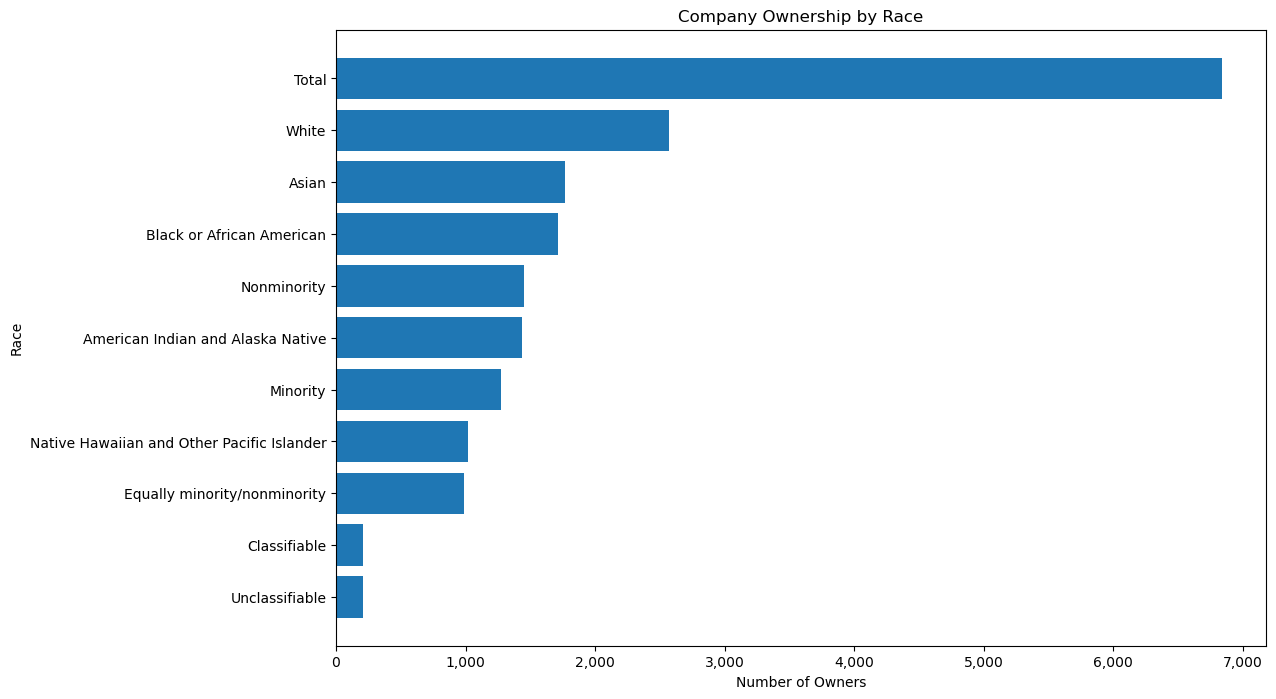

In [42]:
# Create a bar plot using Matplotlib to visualize by race
plt.figure(figsize = (12,8))

plt.barh(y = racedf.index, width = racedf)
plt.xlabel('Number of Owners')
plt.ylabel('Race')
plt.title('Company Ownership by Race')

# Change axis values to regular numbers from Scientific Notation
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

In [51]:
# Group values by industry, get mean numerical values for annual payroll
grouped_df = company_summary.groupby('industry').mean()
grouped_df = grouped_df.sort_values(by='annual_payroll')

,revenue,annual_payroll
industry,,
Industries not classified,0.000000e+00,5.671285e+04
"Agriculture, forestry, fishing and hunting",0.000000e+00,3.312239e+05
Utilities,0.000000e+00,6.420435e+05
"Mining, quarrying, and oil and gas extraction",0.000000e+00,1.024063e+06
Educational services,0.000000e+00,1.369627e+06
"Arts, entertainment, and recreation",0.000000e+00,1.829097e+06
Other services (except public administration),0.000000e+00,2.638020e+06
Real estate and rental and leasing,0.000000e+00,2.671404e+06
Management of companies and enterprises,0.000000e+00,3.574474e+06


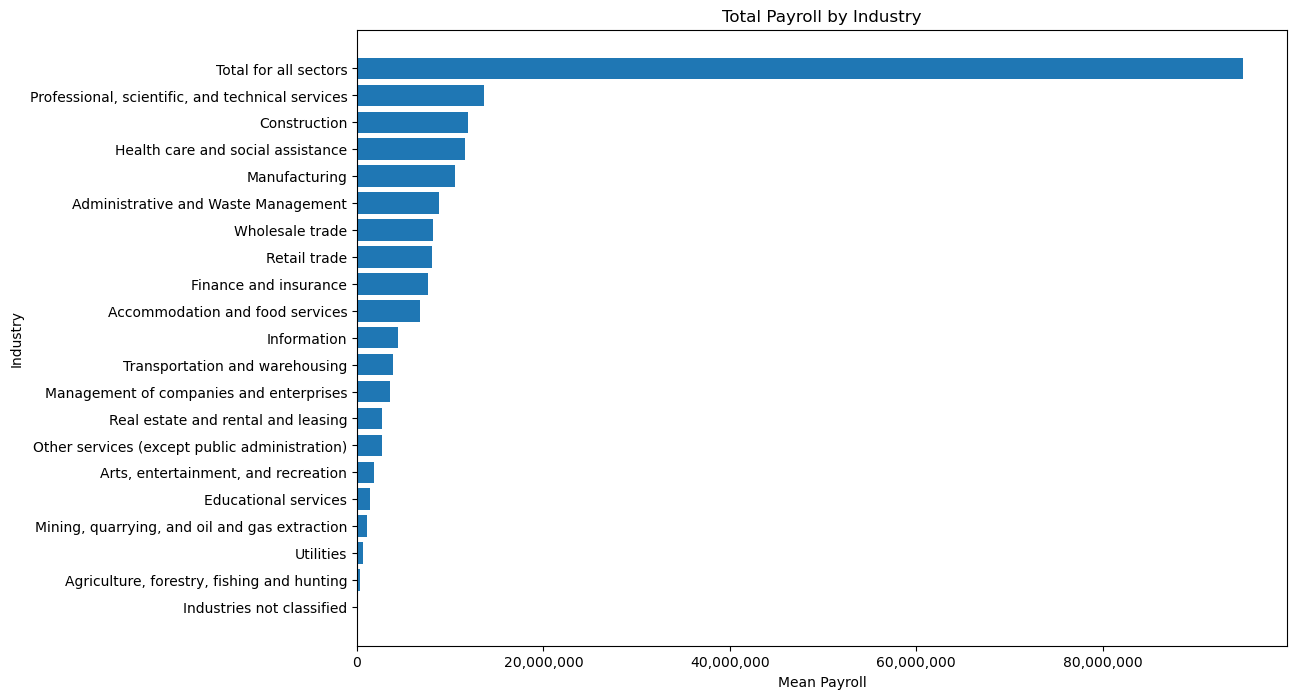

In [52]:
# Matplotlib horizontal bar chart for mean payroll by industry
plt.figure(figsize = (12,8))

plt.barh(grouped_df.index, grouped_df['annual_payroll'])
plt.xlabel('Mean Payroll')
plt.ylabel('Industry')
plt.title('Total Payroll by Industry')

# Change axis values to regular numbers from Scientific Notation
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

In [13]:
# Load in the State company summary table, convert to df with Pandas
data1 = json.loads(response_css.text)
company_summary_st = pd.DataFrame.from_dict(data1)

#Remove the first row from the DF
newcolumn1st = company_summary_st.iloc[0]
company_summary_st = company_summary_st.iloc[1:]
#Rename the columns
company_summary_st.rename(columns=newcolumn1st, inplace = True)
company_summary_st.rename(columns = {
    'NAICS2017_LABEL' : 'industry',
    'RCPPDEMP' : 'revenue',
    'PAYANN' : 'annual_payroll',
    'EMP' : 'employees'
}, inplace = True)

#Reset the index
company_summary_st.reset_index(inplace = True, drop = True)
# Change Types
company_summary_st[['annual_payroll', 'employees', 'FIRMPDEMP']] = company_summary_st[['annual_payroll', 'employees', 'FIRMPDEMP']].astype(int) 
# Sort by annual payroll and number of employees
company_summary_st_sorted = company_summary_st.sort_values(by='annual_payroll', ascending = False)
company_summary_st_sorted_emp = company_summary_st.sort_values(by='employees', ascending = False)

company_summary_st.head()

,GEO_ID,NAME,industry,SEX_LABEL,ETH_GROUP_LABEL,RACE_GROUP_LABEL,VET_GROUP_LABEL,EMPSZFI_LABEL,FIRMPDEMP,revenue,employees,annual_payroll,state
0,0400000US28,Mississippi,Total for all sectors,Total,Total,Total,Total,All firms,40856,0,920447,34137231,28
1,0400000US29,Missouri,Total for all sectors,Total,Total,Total,Total,All firms,106753,0,2464500,116172182,29
2,0400000US30,Montana,Total for all sectors,Total,Total,Total,Total,All firms,31661,0,361600,14060286,30
3,0400000US01,Alabama,Total for all sectors,Total,Total,Total,Total,All firms,67504,0,1630135,73502277,01
4,0400000US27,Minnesota,Total for all sectors,Total,Total,Total,Total,All firms,113774,0,2673014,146712564,27


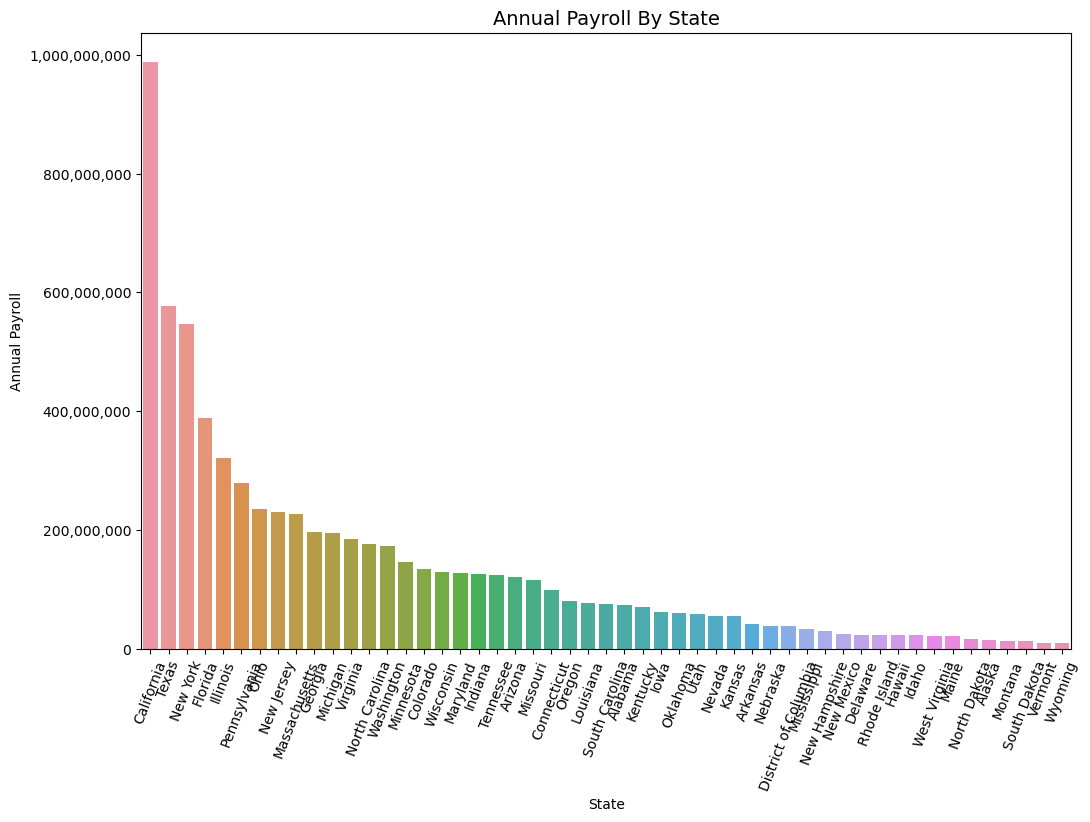

In [14]:
plt.figure(figsize = (12, 8))
#seaborn barplot
sns.barplot(x = company_summary_st_sorted['NAME'], y = company_summary_st_sorted['annual_payroll']);

#rotate tick marks
plt.xticks(rotation = 69);

# change y-axis values to regular numbers
ax = sns.barplot(x = company_summary_st_sorted['NAME'], y = company_summary_st_sorted['annual_payroll'])
ax.yaxis.get_major_formatter().set_scientific(False)
def add_commas(x,pos):
    return '{:,}'.format(int(x))

#add commas to y axis values for readability
ax.yaxis.set_major_formatter(FuncFormatter(add_commas))


#add descriptive title and axis labels
plt.title('Annual Payroll By State', size = 14);
plt.ylabel('Annual Payroll');
plt.xlabel('State');

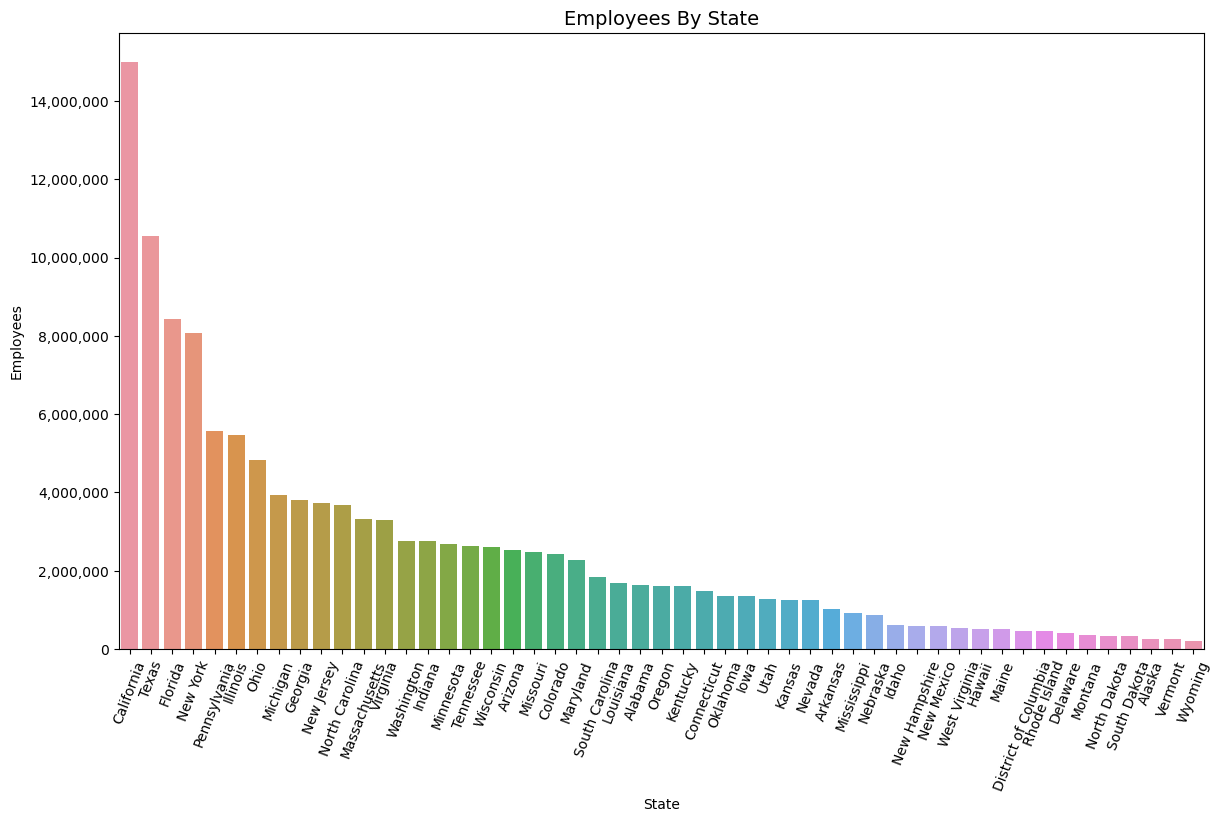

In [15]:
plt.figure(figsize = (14, 8))
#seaborn barplot
sns.barplot(x = company_summary_st_sorted_emp['NAME'], y = company_summary_st_sorted_emp['employees']);

#rotate tick marks
plt.xticks(rotation = 69);

# change y-axis values to regular numbers
ax = sns.barplot(x = company_summary_st_sorted_emp['NAME'], y = company_summary_st_sorted_emp['employees'])
ax.yaxis.get_major_formatter().set_scientific(False)
def add_commas(x,pos):
    return '{:,}'.format(int(x))

ax.yaxis.set_major_formatter(FuncFormatter(add_commas))

#add rotation in degrees

#add descriptive title
plt.title('Employees By State', size = 14);
plt.ylabel('Employees');
plt.xlabel('State');

### Conclusion

Each team member took separate cleaning and transformation steps. Although the general extraction process was very similar, each team member tuned request parameters to focus in on their topic of interest. 